# Cooperative binding
### Credit: Griffin Chure & Manuel Razo

In this script, we will consider a receptor which can bind two ligands. Using the statistical mechanics we learned in lecture, we can enumerate these states, figure out the multiplicity, and compute their statistical weights. How does the probability of each state change with a concentration of ligand? Let's find out!

Recall that the partition function for the two binding-site receptor is given by

\begin{equation}
\mathcal{Z} = 1 + 2\frac{[L]}{[L_0]} e^{-\beta \Delta \epsilon_b} + \left(\frac{[L]}{[L_0]}\right)^2 e^{-\beta (2 \Delta \epsilon_b + \Delta \epsilon_i)},
\tag{1}
\end{equation}

where $C$ is the number of ligands, $\Delta \epsilon_b$ is the ligand binding energy, $\Delta \epsilon_i$ is the interaction energy between binding sites (i.e. the cooperativity) and as usual $\beta \equiv \frac{1}{k_BT}$.

Having this equation in hand let's commit to the values of these variables

In [10]:
% Define the variables 
d_eb = -5; %Energy difference between bound and unbound state (in kT). 
d_ei = -2; %energy of interaction (in kT). 
C = logspace(-4, -1, 1000); %Range of ligand concentrations (in M). 

To save our fingers some work, we'll define the partition function. 

In [29]:
% Define the partition fucntion
Z = 1 + 2 .* C .* exp(-d_eb) + C.^2 .* exp(-(2*d_eb + d_ei));

Now we can compute the probability of each of the states. Remember that the probability of each states is given by the Boltzmann weight of each state divided by the partition function, i.e.

\begin{align}
\tag{2}
P(\text{no bound}) &= \frac{1}{\mathcal{Z}},\\
\tag{3}
P(\text{one bound}) &= \frac{2C e^{-\beta \Delta \epsilon_b}}{\mathcal{Z}},\\
\tag{4}
P(\text{two bound}) &= \frac{C^2 e^{-\beta (2 \Delta \epsilon_b + \Delta \epsilon_i)}}{\mathcal{Z}}.
\end{align}

Let's implement these equationS

In [18]:
%Now we'll compute the probability of each state.
p_empty = 1 ./ Z;  %Nothing bound -- empty receptor. 
p_one = 2 * C * exp(-d_eb) ./ Z; %Probability of one ligand being bound.
p_both = C.^2 .* exp(-(2 * d_eb + d_ei)) ./ Z; %Probability of both.

Now plot the probabilities as a function of ligand concentration. 

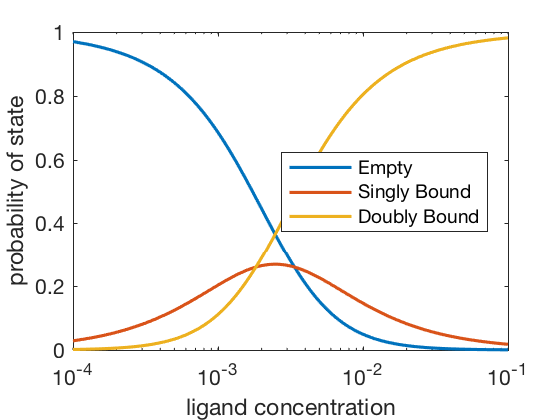

In [19]:
% Plot probabilities as a function of ligand concentration
semilogx(C, p_empty, 'LineWidth', 1.5);
hold on;
semilogx(C, p_one, 'LineWidth', 1.5);
semilogx(C, p_both, 'LineWidth', 1.5);

%Now the most important part.
xlabel('ligand concentration');
ylabel('probability of state');
legend('Empty', 'Singly Bound', 'Doubly Bound', 'Location', 'east');
hold off

There is a lot of interesting stuff going on here. We can see that with a high concentration of ligand, the most common state is having both bound at once. In the middle of the range, empty and doubly bound are equal with a singly bound state less probably.

What would happen if we were to increase the interaction energy $\Delta \epsilon_i$? Qualitatively we would predict that the concentration at which the doubly bound state increases should be lower since it would require lower concentrations for both sites to be occupied. Let's actually look at this!

In [34]:
d_ei_2 = -3; %energy of interaction (in kT). 

% Define the partition fucntion
Z_2 = 1 + 2 .* C .* exp(-d_eb) + C.^2 .* exp(-(2*d_eb + d_ei_2));

%Now we'll compute the probability of each state.
p_empty_2 = 1 ./ Z_2;  %Nothing bound -- empty receptor. 
p_one_2 = 2 *C * exp(-d_eb) ./ Z_2; %Probability of one ligand being bound.
p_both_2 = C.^2 .* exp(-(2 * d_eb + d_ei_2)) ./ Z_2; %Probability of both.

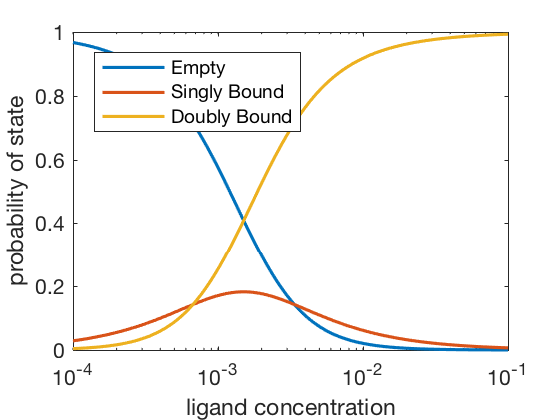

In [35]:
% Plot probabilities as a function of ligand concentration
semilogx(C, p_empty_2, 'LineWidth', 1.5);
hold on;
semilogx(C, p_one_2, 'LineWidth', 1.5);
semilogx(C, p_both_2, 'LineWidth', 1.5);

%Now the most important part.
xlabel('ligand concentration');
ylabel('probability of state');
legend('Empty', 'Singly Bound', 'Doubly Bound', 'Location', 'northwest');
hold off

You might recall that in order to compute the **average** number of bound ligands $\langle n \rangle$ we have to multiply the number of bound ligands by the probability of having that many ligands bound, i.e.

\begin{equation}
\langle n \rangle = 0 \times P(\text{0 bound}) + 1 \times P(\text{1 bound}) + 2 \times P(\text{2 bound}).
\tag{5}
\end{equation}

Substituting these probabilities we find that the average number of ligands is given by

\begin{equation}
\langle n \rangle = 0 \times \frac{1}{\mathcal{Z}} + 1 \times \frac{2C e^{-\beta \Delta \epsilon_b}}{\mathcal{Z}} + 2 \times \frac{C^2 e^{-\beta (2 \Delta \epsilon_b + \Delta \epsilon_i)}}{\mathcal{Z}}.
\end{equation}

Let's compute and plot this quantity as a function of ligand concentration for both of the interaction energies we used.

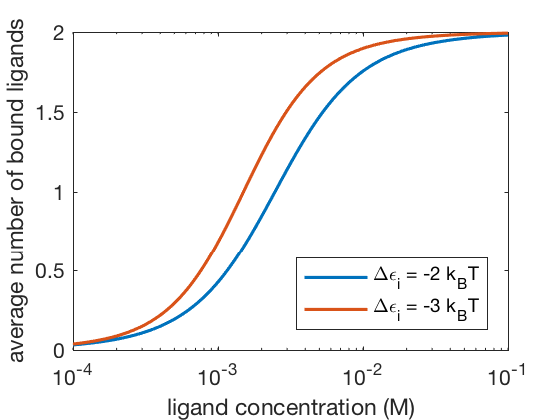

In [38]:
%Since we have already enumerated our probabilities, the calculation is
%trivial.
n_bound = 1 * p_one + 2 * p_both;
n_bound_2 = 1 * p_one_2 + 2 * p_both_2;

%Now let's plot it. 
semilogx(C, n_bound, '-', 'LineWidth', 1.5);
hold on
plot(C, n_bound_2, '-', 'LineWidth', 1.5);
legend('\Delta\epsilon_i = -2 k_BT','\Delta\epsilon_i = -3 k_BT', ...
        'Location', 'southeast')
xlabel('ligand concentration (M)');
ylabel('average number of bound ligands');
hold off